In [2]:
# Import libraries

import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)

In [4]:
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [6]:
Counter(clean_df.death)

Counter({0: 1271359, 1: 146332})

In [7]:
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Resample the training data with SMOTE
X_resampled_s, y_resampled_s = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
Counter(y_resampled_s)

Counter({0: 953519, 1: 953519})

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=14,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
xgb.fit(X_resampled_s, y_resampled_s)

# Make Prediction
y_pred = xgb.predict(X_test_scaled)

# Calculating the metrics scores
acc_score = accuracy_score(y_test, y_pred)
balanced_score = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
newline = '\n'
print(f"Accuracy Score : {acc_score}, Balanced Accuracy Score :{balanced_score}, Precision: {precision}, recall: {recall}")
print(f'Confusion Matrix: {newline}{confusion_matrix(y_test,y_pred)}{newline}')
print(f'Classification Report: {newline}{ classification_report_imbalanced(y_test, y_pred)}{newline}')

Accuracy Score : 0.8565725136348374, Balanced Accuracy Score :0.8578062392285477, Precision: 0.40761341683197844, recall: 0.8593609053385453
Confusion Matrix: 
[[272151  45689]
 [  5145  31438]]

Classification Report: 
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.86      0.86      0.91      0.86      0.74    317840
          1       0.41      0.86      0.86      0.55      0.86      0.74     36583

avg / total       0.92      0.86      0.86      0.88      0.86      0.74    354423




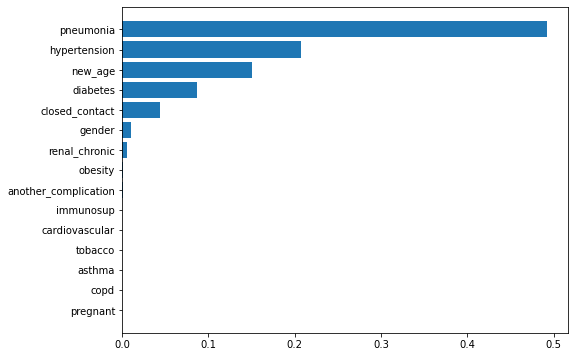

In [12]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = xgb.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)
x = np.arange(sorted_index.shape[0]) + .5
# Create tick labels 
labels = np.array(X.columns)[sorted_index]
plt.figure(figsize=(8, 6))
plt.barh(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.yticks()
plt.show()

In [13]:
import pickle
# save the model to disk
filename = 'xgb_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [21]:
loaded_model = pickle.load(open(filename, 'rb'))
predict = loaded_model.predict(X_test)
result = loaded_model.score(X_test_scaled, y_test)
result

0.8565725136348374